MySQL 연동

1.MySQL 연동
1)필요한 패키지 - pyMySQL
=>확인 : pip list
=>설치 : pip install 패키지이름 또는 경로

2)샘플 데이터 생성
=>로컬 데이터베이스를 사용하는 경우를 제외하고는 DDL 을 애플리케이션에서 수행하는 경우는 드뭄

use cyberadam;

create table usertbl(
	userid char(15) not null primary key,
	name varchar(20) not null,
	birthyear int not null,
	addr char(100),
	mobile char(11),
	mdate date
);

insert into usertbl values('karina', '유지민', 2000, '경기도 수원', 
'01000000000', '2000-04-11');

select *
from usertbl;

commit;

3)DML 수행 순서
=>데이터베이스 연결
=>연결 객체에서 cursor()를 호출해서 SQL 실행 객체를 생성
=>execute(sql 문장)를 호출
=>commit 이나 rollback을 호출해서 작업을 완료
=>데이터베이스 연결 해제

4)데이터 삽입 
import sys, pymysql

5)데이터 조회
=>데이터를 조회할 때는 execute를 호출하고 난 후 fetchone() 이나 fetchall() 메서드를 호출하면 각 행을 튜플로 해서 fetchone 의 경우는 튜플 1개를 fetchall 의 튜플을 순회할 수 있는 iterator를 리턴합니다.

In [17]:
import sys, pymysql

#연결 객체 변수 생성
con = None

try:
    #연결
    '''con = pymysql.connect(host='연결할 컴퓨터정보', port=포트번호, 
                            db='데이터베이스 이름', user='계정', passwd='비밀번호', 
                            charset='인코딩방식')'''
    
    con = pymysql.connect(host='localhost', port=3306, 
                          db='user00', user='root', passwd='mysql', charset='utf8')
    #print(con)
    
    #sql 실행객체 가져오기
    cursor = con.cursor()
    '''
    cursor.execute("insert into usertbl values('kimheyryun', 'KHR', 1998, '충남 예산군', '01020585290', '2021-12-28')")    
    con.commit()
    '''
    
    '''
    #파라미터 매핑 - ㅇ치방법보다 보안 강화
    cursor.execute("insert into usertbl value(%s,%s,%s,%s,%s,%s)",
                  ("hyeryun19", "JAYDEN", 2000, "LA", "01023456789","2021-04-27"))
    con.commit()
    '''
    #데이터 조회
    cursor.execute('select * from usertbl')
    #1개 가져오기-튜플단위
    data = cursor.fetchone()
    print(data)
    
    #쪼개기-행단위
    for item in data:
        print(item)
        
        
except Exception as e:
    print(e)
    print(sys.exe_info())
finally:
    #연결해제
    if con != None:
        con.close()

('90x619', '김혜련', 1990, '서울 양천구', '01026089019', datetime.date(2022, 2, 7))
90x619
김혜련
1990
서울 양천구
01026089019
2022-02-07


#MongoDB
1)설치
=>Mac
brew tap mongodb/brew
brew install mongodb-community

=>windows 는 Mongo DB 사이트에서 설치 프로그램을 다운로드
c:\program files\mongo db

2)서버 시작
=>mac : brew services start mongodb-community
=>windows 는 bin 디렉토리에 있는 mongod --dbpath 저장경로

3)패키지 - pymongo

4)MongoDB 연결

In [18]:
from pymongo import MongoClient
con = MongoClient('192.168.219.108')
print(con)

MongoClient(host=['192.168.219.108:27017'], document_class=dict, tz_aware=False, connect=True)


5)데이터 삽입

In [ ]:
from pymongo import MongoClient

con = MongoClient('192.168.219.108')

#사용할 데이터베이스 연결
db = con.mymongo

#컬렉션 설정 - 테이블 생성 또는 연결
collect = db.users

#삽입할 데이터 생성 - dict
doc1={'empno':'0001', 'ename':'김좌진'}
doc2={'empno':'0002', 'ename':'안중근'}
doc3={'empno':'0003', 'ename':'유관순'}
doc4={'empno':'0004', 'ename':'이순신'}

collect.insert_one(doc1)
collect.insert_many[(doc2,doc4)]

6)삽입한 후 Mongo 클라이언트에서 확인
>use mymongo

>db.users.find()

7)데이터조회

In [26]:
from pymongo import MongoClient

con = MongoClient('192.168.219.108')

#사용할 데이터베이스 연결
db = con.mymongo

#컬렉션 설정 - 테이블 생성 또는 연결
collect = db.users

#조회
result = collect.find()

print(result)

for temp in result:
    print(temp)
    print(type(temp['_id']))

ServerSelectionTimeoutError: 192.168.219.108:27017: timed out, Timeout: 30s, Topology Description: <TopologyDescription id: 62009050ca4000f0f34c44b1, topology_type: Unknown, servers: [<ServerDescription ('192.168.219.108', 27017) server_type: Unknown, rtt: None, error=NetworkTimeout('192.168.219.108:27017: timed out')>]>

#웹에서 데이터 가져오기
=>Open API 나 API를 제공하는 데이터는 권한만 있으면 수집이 가능
=>API 가 아닌 HTML 스크래핑은 주의해야 합니다.

1.기본 패키지를 이용한 웹 문자열 가져오기
=>python 에서는 urllib 와 urllib2 패키지를 제공
=>request 모듈의 urlopen 이라는 함수를 이용해서 url을 설정해서 응답 객체를 생성
url을 만들 때는 파라미터 부분에 한글이 있으면 인코딩을 해서 대입해야 합니다.
=>응답 객체를 가지고 getheaders()를 호출하면 서버의 정보를 가져올 수 있고 status 속성을 이용하면 서버의 상태 정보를 그리고 read()를 호출하면 내용을 읽을 수 있음
=>내용에 한글이 있는 경우 decode()를 이용해서 읽은 내용을 디코딩 해야 하는 경우도 있음
=>응답객체.info().get_content_charset()을 이용하면 내용의 인코딩 정보를 찾아올 수 있습니다.

1)데이터 읽어오기

utf-8

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content=
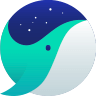
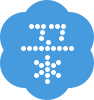

In [29]:
import urllib.request

#데이터 읽기
response = urllib.request.urlopen('http://www.naver.com')
#바이트 배열
data = response.read()

#읽어온 데이터 인코딩 확인
encoding = response.info().get_content_charset()
print(encoding)

#인코딩설정
html = data.decode('utf-8')
print(html)

2)파라미터(query string 이라고도 하는데 url 뒤에 ? 이름=값& 의 형태로 웹 클라이언트가 웹 서버에게 넘겨주는 데이터) 인코딩
=>urllib.parse 모듈 이용
=>quote_plus(공백을 +로 인코딩) 함수 와 quote(공백을 %20으로 인코딩) 함수를 이용


In [33]:
#파라미터에 한글있어서 에러
import urllib.request
#파라미터 인코딩을 위한 모듈
from urllib.parse import quote
keyword = quote('코로나')

#데이터 읽기
response = urllib.request.urlopen('http://search.hani.co.kr/Search?command=query&keyword='+keyword+
                                  '&sort=d&period=all&datefrom=1988.01.01&dateto=2022.02.07&media=news')
#바이트 배열
data = response.read()

#읽어온 데이터 인코딩 확인
encoding = response.info().get_content_charset()
print(encoding)

#인코딩설정
html = data.decode('utf-8')
print(html)

utf-8











<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!--[if IE]><![endif]-->
<!--[if lt IE 7 ]><html class="no-js ie6" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 7 ]><html class="no-js ie7" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 8 ]><html class="no-js ie8" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" lang="ko" xml:lang="ko"><![endif]-->
<!--[if IE 9 ]><html class="no-js ie9" xmlns:fb="http://ogp.me/ns/fb#" lang="ko" xml:lang="ko"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" xmlns:fb="http://ogp.me/ns/fb#" lang="ko" xml:lang="ko">
<!--<![endif]-->
<head>
<meta name="google-site-verification" content="-FbcGJL6VLefS4uRfDR1U-NYpWg1gPzAgE7YPGk5M-c" />
<link rel="shor

2.requests 패키지 이용 - 외부 모듈(anaconda 에서는 설치가 되어 있음)
=>open api를 이용해야 하는 경우 많이 사용

=>읽기: requests.get(url)을 이용하면 get 방식으로 읽어서 Response 객체를 리턴
읽어 올 때 post, put, delete 메서드 이용도 가능
파라미터는 data 속성에 dict 형태로 대입하면 됩니다.

header 옵션을 이용해서 header를 dict 형태로 대입해서 header 전송이 가능

text 속성을 이용하면 문자열을 가져올 수 있고 content 속성을 이용하면 bytes 로 가져올 수 있음

=>인코딩
특별한 경우가 아니면 text 속성이 인코딩을 유추해서 해주는데 직접 하고자 할 때는 Response 객체의 encoding 속성을 이용해서 설정하면 됩니다.

1)텍스트 읽어오기

In [35]:
#텍스트 가져오기
import requests

response = requests.get("http://www.naver.com")
#print(response.text)

response = requests.get("http://www.tjoeun.co.kr")
print(response.text)


<!doctype html>
<html lang="ko">
<head>
	<title>더조은컴퓨터아카데미</title>
	<meta property="og:type" content="website">
	<meta property="og:url" content="http://www.tjoeun.co.kr">
	<meta property="og:image" content="http://www.tjoeun.co.kr/images/tjdpimg.jpg">
	<meta property="og:title" content="더조은컴퓨터아카데미">
	<meta property="og:description" content="국비지원 컴퓨터학원, 국비전액무료, IT/디자인 전문교육, 전산세무회계, 1:1취업지원">
	<meta name="Description" content="국비지원 컴퓨터학원, 국비전액무료, IT/디자인 전문교육, 전산세무회계, 1:1취업지원"/>
<meta charset="euc-kr" />
<meta http-equiv="X-UA-Compatible" content="IE=edge, chrome=1">
<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=medium-dpi">



<!--meta name="google-site-verification" content="LWa-oO6JWr68MO8QR5_Gnie-aRyX6HTj2ogNVmCOpsw" /-->
<meta name="google-site-verification" content="sS2OrG0YJUH90QVsBKm7d0xx9r1O5cu6bJpXKq-z9nY" />
<meta name="ROBOTS" content="all" />
<meta name="NaverBot" content="ALL

In [38]:
#이미지 가져오기
import requests

imgurl = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fairtravelinfo.kr%2Fair_sense_board%2F8058&psig=AOvVaw25NOBgiFMYKoclP5ZHuxol&ust=1644293673540000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCMidm7Td7PUCFQAAAAAdAAAAABAD"
response = requests.get(imgurl)

with open('C:/programming/python/data/flight.jpg', 'wb') as f:
    img = response.content
    f.write(img)

JSON 파싱
=>json 패키지를 import 하고 json.loads(문자열)하게 되면 json 파싱한 결과를 리턴합니다.
[ ]: python 의 list
{ }: python 의 dict

=>Kakao REST API Key

In [46]:
#카카오 오픈 API 데이터 가져오기 - 카테고리 검색
import requests
import json


url = 'http://dapi.kakao.com/v2/local/search/category.json?category_group_code=PM9&y=37.539973887047&x=126.83235010867&radius=5000'
headers = {'Authorization':'KakaoAK 2760e42d238389e42239e8be77b385c4'}

data = requests.get(url, headers=headers)
#print(data.text)

#json 파싱
result = json.loads(data.text)
#print(type(result))

documents = result["documents"]
#print(documents)

for temp in documents:
    print(temp['place_name'],":", temp['address_name'])

바이엘약국 : 서울 강서구 화곡동 1070
메디팜사랑약국 : 서울 강서구 화곡동 1073-8
라온365온누리약국 : 서울 강서구 화곡동 1075-1
화곡태평양약국 : 서울 강서구 화곡3동 1032-27
대학약국 : 서울 강서구 화곡동 1074-7
신월메디칼약국 : 서울 양천구 신월동 52-10
햇살온누리약국 : 서울 강서구 화곡동 1073-10
이화약국 : 서울 강서구 화곡동 1051-1
소원약국 : 서울 강서구 화곡동 1065-22
행복나무약국 : 서울 강서구 화곡동 1032-18
강약국 : 서울 양천구 신월동 23-14
샘약국 : 서울 양천구 신월동 27-7
대우실로암약국 : 서울 양천구 신월동 18-4
21세기세계로약국 : 서울 강서구 화곡동 1064-4
천수약국 : 서울 강서구 화곡동 362-84


3.HTML Parsing
=>beautifulsoup4 패키지 이용 - anaconda 버전에는 이미 설치 되어 있음, python 에서는 설치해야 함
=>import 할 때는 bs4
=>HTML 문자열을 메모리에 펼쳐야 하는데 이 때는 bs4.BeautifulSoup(html 문자열, 'html.parser')
1)태그에 접근
펼쳐진내용.태그이름 으로 데이터에 접근 한 후 get_text()를 호출하면 태그 내의 내용만 추출 가능

find(tag, attributes, recuresive, text, limit, keywords)

find_all(태그)

2)선택자를 이용한 접근
select(선택자)를 호출하면 선택자를 가진 모든 document 들의 list를 리턴함

list 내를 순회하면 태그 내용을 가져올 때는 getText() 그리고 속성의 값을 가져올 때는 get(속성이름)을 호출하면 됩니다.

3)https://tv.naver.com/r/  에서 타이틀 가져오기
4)HTML 파싱할 때 링크를 타고 가져와야 하는 경우는 a 태그의 href 속성의 값을 가져와서 사용해야 합니다.

In [51]:
#http://tv.naver.com/r/ 에서 타이틀가져오기
import requests, bs4

#html 가져오기
response = requests.get('http://tv.naver.com/r/')
html = response.text

#html을 메모리에 펼치기
bs = bs4.BeautifulSoup(html, 'html.parser')
#print(bs)

#필요한 데이터 선택
tags = bs.select(' a > strong > span')

for tag in tags:
    print(tag.getText())
    
tags = bs.select(' dl > dt > a > tooltip')

for tag in tags:
    print(tag.getText())
    
 
tags = bs.select('tr > td.menu-text > div.menu-name.ng-binding')

for tag in tags:
    print(tag.getText()) 

‘드디어 터진 2호골’ 리오넬 메시의 감각적인 추가골 [릴 vs PSG]
[영상] 발리예바, ‘금빛’ 4회전 점프…실수에도 탁월해! - 피겨 단체 여자프리
[선공개] 유독 긴장한 '37호' & 편안하고 즐거운 무대를 준비한 '31호'🎤
[선공개] ‘캐나다댁’ 선예, 충격 일탈 사건의 이야기는?! (ft. 다혈질 부부)
[최초 공개] 모두를 들썩이게 한 영탁의 건달춤?! '전복 먹으러 갈래~♪' 신곡에 찰떡인 안
[신현준네] 8개월 비타민서의 ‘폭풍 배밀이’ 현장! | KBS 220206 방송
[영상] "경쟁자는 바로 나" 발리예바, 실수에도 침착하게! (피겨 단체전 여자 프리)
16화#하이라이트# 세상 단 둘 뿐인 불가살 연인, 이진욱X권나라의 천 년의 사랑♡
"수치스럽다" 美서 태어난 中 피겨선수 넘어지자 쏟아진 조롱
김호중 ‘그대 향한 사랑’ ♫ 본업도 완벽..❤
[선공개] 유이 협박하는 이태성에 냅다 주먹 날리는 정지훈X김범!
노래에 진정성이 없어! 진정성을 위해 장민호 주리 트는 사이코러스??..OMG | tvN 220206 방송
[티저] 형들 볼려고 나인우가 찾아왔어염❤️ 당돌한 막둥이의 애정표현에 멤버들은 당황☺️ㅋㅋ | KBS 방송
[Serie A] '보물이 들어왔네' 이적생 블라호비치의 데뷔골!
"중국에 특혜" 국제심판도 이해 못한 &#39;노터치 금메달&#39;
클래식 아기 자장가모음 무료듣기 수면음악 입니다. classical music
스팸과 참치 요리중 제일맛있어요 /명절에 들어온 참치,스팸 활용요리
[라리가] 23R 바르셀로나 vs AT 마드리드 골모음
[라리가] 8년만에 바르셀로나 복귀골, 다니 알베스
[2회 선공개] 강호동팀vs은지원팀 팀명 공개! 시작부터 신경전 불타오르네♨
＂이게 다 날 위한 거라고?＂ 선을 넘어 개입하는 이일화에게 분노하는 지현우! | KBS 220206 방송
[가로직캠] 이찬원 - 모든 날, 모든 순간(Lee Chan won - FAN CAM) | KBS 방송
다시 태어나도 이솔로몬 하자..💖 ‘내 사람’♬ T

In [60]:
#http://tv.naver.com/r/ 에서 타이틀가져오기
import requests, bs4

#html 가져오기
response = requests.get('https://www.yogiyo.co.kr/mobile/#/246418/')
html = response.text
print(response.text)

#html을 메모리에 펼치기
bs = bs4.BeautifulSoup(html, 'html.parser')
#print(bs)

#필요한 데이터 선택
tags = bs.select('div.menu-name.ng-binding')

for tag in tags:
    print(tag.getText()) 

<!DOCTYPE html><html lang='ko' ng-controller='base_controller'><head><meta charset='utf-8'><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta name='viewport' content='width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no'><meta name='apple-mobile-web-app-capable' content='yes'><meta name='apple-mobile-web-app-status-bar-style' content='black-translucent'><meta name="google-site-verification" content="U4GhkkNiUMneDT6RC-apM8m8D6hZJfAXVfXi2_SuyWU"><meta name="keywords" content="ì¹í¨, ìê¸°ì, ì¤êµ­ì§, í¼ì, ì¹í¨ì¶ì², ë°°ë¬ìì, ì¼ì, ë´ì£¼ë³ë§ì§, ì§ì¥ë©´, ê·¼ì²ì¤êµ­ì§, ë°°ë¬, ë­ë¨¹ì§, ë§ìëì¹í¨ì¶ì², ì¬ê¸°ì, ì ì¬ë©ë´ì¶ì², ìê¸°ìì²«ì£¼ë¬¸í ì¸, ì¤íìë¦¬, í¼ìì¶ì², ë§ìëìì, ì¹í¨ë°°ë¬, í¼ìë°°ë¬, ê·¼ì²ì¤êµ­ì§ë°°ë¬, ë§ìëì¹í¨ìì, ì¼ìì¶ì², ê·¼ì²ì¹í¨ì§, íë¼ì´ëì¹í¨ìì, ì¡±ë°ì§, ëì§ìë©´, ìê¸°ìì¿ í°, ì§ì¥ë©´ì§, ë°°ë¬ì±, ì¡±ë°ë°°ë¬, í¼ìì§, 

In [65]:
#기상청 오늘의 날씨 사이트에서 지점과 체감온도, 습도, 풍속 가져오기
import requests, bs4

#html 확인
response = requests.get(
    ' https://www.weather.go.kr/weather/observation/currentweather.jsp')
#print(response.text)

soup = bs4.BeautifulSoup(response.text, 'html.parser')
#print(soup)

#원하는 정보가 있는 테이블 선택
table = soup.select('.table_develop3')
#print(table)

#테이블의 각 행을 전부추출
for temp in table[0].find_all('tr'):
    #각 줄의 각 칸들을 list 로 변환
    tds = list(temp.find_all('td'))
    #list 순회
    for td in tds:
        if td.find('a'):
            print(td.find('a').text, ":", tds[7].text, ":", tds[10].text, ":", tds[11].text)

강릉 : 2.8 : 32 : 동남동
강진군 : -0.3 : 34 : 북북서
강화 : -3.1 : 37 : 서
거제 : 4.2 : 26 : 서북서
거창 : 1.0 : 18 : 북
경주시 : 0.8 : 19 : 북북서
고산 : -0.4 : 59 : 북
고창 : -4.2 : 34 : 북북서
고창군 : -2.3 : 38 : 서북서
고흥 : 1.1 : 30 : 북서
광양시 : 3.0 : 36 : 남남서
광주 : 1.8 : 31 : 북북서
구미 : 2.7 : 25 : 서남서
군산 : -2.5 : 50 : 서북서
금산 : -1.1 : 29 : 서북서
김해시 : 0.1 : 21 : 북서
남원 : -0.2 : 32 : 북서
남해 : 2.6 : 37 : 북북동
대관령 : -7.5 : 26 : 서남서
대구 : -0.1 : 25 : 서북서
대전 : -0.1 : 25 : 북서
동두천 : -2.5 : 29 : 서북서
동해 : 2.5 : 37 : 동북동
목포 : -3.9 : 41 : 북
문경 : -0.8 : 27 : 서
밀양 : 3.2 : 14 : 서북서
백령도 : -0.4 : 44 : 서남서
보령 : 0.4 : 35 : 북북서
보성군 : -0.3 : 28 : 북북서
보은 : -1.8 : 29 : 북북서
봉화 : 0.1 : 27 : 남서
부산 : 1.6 : 26 : 서북서
부안 : -1.0 : 48 : 서북서
부여 : 0.0 : 31 : 서북서
북강릉 : 2.2 : 36 : 동북동
북창원 : 1.5 : 21 : 북서
북춘천 : -0.4 : 28 : 남
산청 : 1.4 : 22 : 서북서
상주 : 1.1 : 26 : 남서
서귀포 : 5.1 : 71 : 남
서산 : -3.4 : 39 : 서북서
서울 : -2.1 : 36 : 서남서
성산 : 1.8 : 53 : 남동
세종 : -3.2 : 25 : 북북서
속초 : 0.6 : 37 : 북동
수원 : -2.9 : 39 : 서
순창군 : -3.0 : 39 : 북서
순천 : -1.8 : 35 : 서
안동 : -1.0 : 20 : 서
양산시 : 3.0 

XML파싱
4.XML Parsing
=>beatifulsoup를 사용할 때 html-parser 대신에 lxml-xml 을 이용하면 됩니다.
=>동아일보 전체 기사 rss: https://rss.donga.com/total.xml

동아일보 전체 기사 파싱

In [69]:
import requests, bs4

#html확인
response = requests.get('https://rss.donga.com/total.xml')
#print(response.text)

rss = bs4.BeautifulSoup(response.text, 'lxml-xml')
#print(rss)

#item 태그안의 title 추출
items = rss.find_all('item')
print(items)

[<item>
<title>서경덕 “개막식때 등장한 ‘중국 설’ 문구, 문화패권주의적 사고방식”</title>
<link>https://www.donga.com/news/Sports/article/all/20220207/111628146/1</link>
<pubDate>Mon, 07 Feb 2022 17:03:00 +0900</pubDate>
<description>&lt;img src='https://dimg.donga.com/i/150/150/90/wps/NEWS/IMAGE/2022/02/07/111614591.2.jpg' align='left' vspace='10' hspace='10'&gt;중국 베이징 겨울올림픽 개회식에 등장한 ‘중국 설(Chinese New Year)’ 표현에 대해 “아시아권의 보편적인 문화를 중국만의 문화인양 소개했다”고 지적이 나왔다.   서경덕 성신여대 교수는 7일 “베이징 올림픽 개회식 초반에 ‘Happy Chinese New Year’라는 문구가 대형 LED 화면에 나왔다”며 “아무리 자국에서 올림픽을 개최한다 하더라도 음력 설을 중국만의 문화인 것처럼 소개한 것은 문화 패권주의적 사고방식이자 올림픽 정신에도 위배되는 행위”라고 비판했다. 설날은 한국 베트남 싱가포르 말레이시아 등 다양한 아시아 국가에서 기념하는 만큼 ‘음력 설(Lunar New Year)’을 사용해야 한다”는 것이다.  서 교수에 따르면 최근 수 년 간 미국 내 한인단체 등 아시아계 단체들이 중국 설 표현에 문제를 제기하자 ‘Lunar New Year’ 표현을 쓰는 경우가 많아졌다. 보리스 존슨 영국 총리도 지난해까지는 축하 영상에서 “중국 설을 축하한다”고 했다가 올해부</description>
<media:content type="image/jpg" url="https://dimg.donga.com/i/150/150/90/wps/NEWS/IMAGE/2022/02/07/111614591.2.jpg"/>
</item>, <item>
<title>이재명, 김

#Selenium
5.selenium
=>requests 모듈은 현재 보여지는 페이지의 내용만 가져올 수 있음
=>ajax(동적으로 제공되는 컨텐츠) 형태로 제공되는 데이터는 requests 로 읽어올 수 없으며 브라우저에 값을 입력하는 것도 안됨
=>이런 경우는 웹 앱을 테스트할 목적으로 만든 selenium 을 이용해서 처리하는 것이 가능
=>브라우저를 동적으로 제어해서 브라우저 안의 내용을 가져오는 것이 가능
매크로를 만들거나 동적으로 제공되는 데이터를 읽어오는데 사용
=>브라우저를 활용하지 않고 스크래핑 할 수 있는 scrapy를 사용하기도 하며 특정 시간 등에 자동으로 크롤링을 하고자 할 때는 shell 스크립트 작성 요령도 알아야 합니다.

1)준비
=>selenium 패키지 설치 - pip install selenium
=>제어하고자 하는 브라우저의 드라이버가 필요: 버전 확인 필요
브라우저가 업데이트되면 이전 드라이버 가지고는 안됨

2)메뉴얼
=>http://selenium-python.readthedocs.io/index.html
=>http://docs.seleniumhq.org/docs/


3)크롬 실행

In [83]:
###크롬설정
from selenium import webdriver

#드라이버 경로를 설정하면 크롬실행
driver=webdriver.Chrome('C:/programming/chromedriver')

driver.get("www.google.com")

<ipython-input-83-b10f51d3762e>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('C:/programming/chromedriver')


InvalidArgumentException: Message: invalid argument
  (Session info: chrome=97.0.4692.99)
Stacktrace:
Backtrace:
	Ordinal0 [0x00CEFDC3+2555331]
	Ordinal0 [0x00C877F1+2127857]
	Ordinal0 [0x00B82CD0+1060048]
	Ordinal0 [0x00B75763+1005411]
	Ordinal0 [0x00B745DD+1000925]
	Ordinal0 [0x00B746B6+1001142]
	Ordinal0 [0x00B843FA+1065978]
	Ordinal0 [0x00BD7BAD+1407917]
	Ordinal0 [0x00BC7B0C+1342220]
	Ordinal0 [0x00BD75FA+1406458]
	Ordinal0 [0x00BC7976+1341814]
	Ordinal0 [0x00BA36B6+1193654]
	Ordinal0 [0x00BA4546+1197382]
	GetHandleVerifier [0x00E89622+1619522]
	GetHandleVerifier [0x00F3882C+2336844]
	GetHandleVerifier [0x00D823E1+541697]
	GetHandleVerifier [0x00D81443+537699]
	Ordinal0 [0x00C8D18E+2150798]
	Ordinal0 [0x00C91518+2168088]
	Ordinal0 [0x00C91660+2168416]
	Ordinal0 [0x00C9B330+2208560]
	BaseThreadInitThunk [0x773D6739+25]
	RtlGetFullPathName_UEx [0x77BA8AFF+1215]
	RtlGetFullPathName_UEx [0x77BA8ACD+1165]


4)드라이버의 메서드
get(url): url에 접속
implicitly_wait(초단위시간): 대기
quit(): 브라우저 종료

5)element(태그 요소) 에 접근
=>하나의 element 에 접근
find_element_by_name(name)
find_element_by_id(id)
find_element_by_xpath(xpath)

=>여러 개의 element 에 접근
find_element_by_css_selector(선택자)
find_element_by_class_name(클래스이름)
find_element_by_tag_name(태그이름)

6)요소에 동작
요소를 찾고 send_keys(값)을 이용하면 요소에 값을 설정 - 입력 요소
요소를 찾고 click()을 이용하면 요소를 클릭한 효과 - 버튼 과 a 태그
요소를 찾고 submit()을 이용하면 form 의 데이터를 전송하는 효과 - form 에만 사용

7)다음 로그인하기

In [81]:
###크롬설정
from selenium import webdriver

#드라이버 경로를 설정하면 크롬실행
driver=webdriver.Chrome('C:/programming/chromedriver')

#다음 로그인 페이지 이동
driver.get("https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net")

#아이디와 비밀번호 입력
driver.find_element_by_xpath('//*[@id="id"]').send_keys('kimheyryun-_-')
driver.find_element_by_xpath('//*[@id="inputPwd"]').send_keys('1033639khr!')

#로그인 버튼을 찾아서 클릭
driver.find_element_by_xpath('//*[@id="loginBtn"]').click()

driver.find_element_by_class_name(".link_login link_klogin").click()


<ipython-input-81-0d631a38e1e4>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('C:/programming/chromedriver')
<ipython-input-81-0d631a38e1e4>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="id"]').send_keys('kimheyryun-_-')
<ipython-input-81-0d631a38e1e4>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="inputPwd"]').send_keys('1033639khr!')
<ipython-input-81-0d631a38e1e4>:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="loginBtn"]').click()
<ipython-input-81-0d631a38e1e4>:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_class_name(".link_login link_klogin").click()


InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=97.0.4692.99)
Stacktrace:
Backtrace:
	Ordinal0 [0x00CEFDC3+2555331]
	Ordinal0 [0x00C877F1+2127857]
	Ordinal0 [0x00B82E08+1060360]
	Ordinal0 [0x00B85524+1070372]
	Ordinal0 [0x00B853EE+1070062]
	Ordinal0 [0x00B85650+1070672]
	Ordinal0 [0x00BAE212+1237522]
	Ordinal0 [0x00BAE69B+1238683]
	Ordinal0 [0x00BD9252+1413714]
	Ordinal0 [0x00BC7B54+1342292]
	Ordinal0 [0x00BD75FA+1406458]
	Ordinal0 [0x00BC7976+1341814]
	Ordinal0 [0x00BA36B6+1193654]
	Ordinal0 [0x00BA4546+1197382]
	GetHandleVerifier [0x00E89622+1619522]
	GetHandleVerifier [0x00F3882C+2336844]
	GetHandleVerifier [0x00D823E1+541697]
	GetHandleVerifier [0x00D81443+537699]
	Ordinal0 [0x00C8D18E+2150798]
	Ordinal0 [0x00C91518+2168088]
	Ordinal0 [0x00C91660+2168416]
	Ordinal0 [0x00C9B330+2208560]
	BaseThreadInitThunk [0x773D6739+25]
	RtlGetFullPathName_UEx [0x77BA8AFF+1215]
	RtlGetFullPathName_UEx [0x77BA8ACD+1165]


8)하나의 웹 페이지에서 xpath를 찾았는데 제대로 동작하지 않는 경우
=>현재 페이지가 여러 개의 frame 으로 나누어져 있는 경우
driver.switch_to_frame(프레임의 id 나 name) 을 이용해서 프레임으로 이동한 후 작업

9)브라우저를 출력하지 않고 데이터 가져오기
=>ChromeOptions 에 headless 를 설정해야 합니다.
=>접속한 사이트의 내용을 가져올 때는 page_source

#다음 로그인 하기

<ipython-input-80-7360453839e7>:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('C:/programming/chromedriver')


<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url"
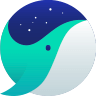
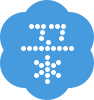

In [80]:
###크롬설정
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument('disable-gpu')

#드라이버 경로를 설정하면 크롬실행
driver=webdriver.Chrome('C:/programming/chromedriver')

driver.get('http://www.naver.com')

print(driver.page_source)

10)스크롤
=>body 태그에 Keys.PAGE_DOWN 을 전송하면 됩니다.

In [82]:
#유투브 스크롤
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

#드라이버 경로를 설정하면 크롬이 실행됩니다.
driver=webdriver.Chrome('C:/programming/chromedriver')

driver.get('https://www.youtube.com')

body = driver.find_element_by_tag_name('body')

time.sleep(10)

body.send_keys(Keys.PAGE_DOWN)

time.sleep(10)

body.send_keys(Keys.PAGE_DOWN)

<ipython-input-82-b1e19d868d0f>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('C:/programming/chromedriver')
<ipython-input-82-b1e19d868d0f>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  body = driver.find_element_by_tag_name('body')
